### Normalization

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('wine.csv', header = None, usecols =[0,1,2])
df.columns = ['Class label' , 'Alcohol' , 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,Class label,Alcohol,Malic acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
781,2,12.42,1.61
782,2,12.29,1.61
783,2,11.64,2.06
784,2,12.08,1.39


In [3]:
import pandas as pd
import seaborn as sns

# If you read from CSV
df = pd.read_csv('wine.csv', header=0)  # make first row as column names


In [4]:
df['Class label'] = df['Class label'].astype(int)


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

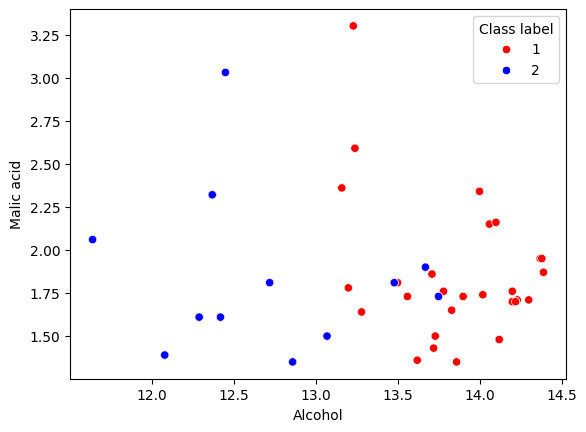

In [5]:
color = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(
    x=df['Alcohol'],
    y=df['Malic acid'],
    hue=df['Class label'],
    palette=color
)


<Axes: xlabel='Alcohol', ylabel='Density'>

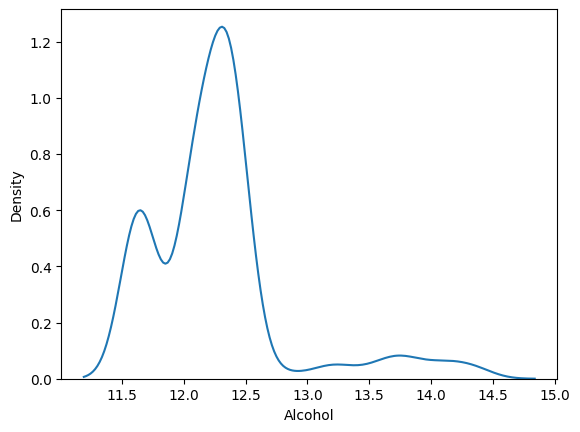

In [6]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

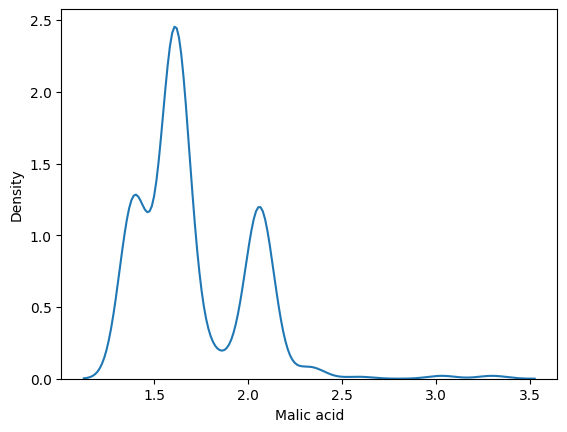

In [7]:
sns.kdeplot(df['Malic acid'])

In [8]:
from sklearn.model_selection import train_test_split

# Select only the two columns you want
X = df[['Alcohol', 'Malic acid']]
y = df['Class label']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0
)

# Check shapes
x_train.shape, x_test.shape


((235, 2), (550, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #  creating an object 

# fit the ascaler to the train set , it will learn the parameters 
scaler.fit(x_train)

# transform train and test sets 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [10]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)


In [11]:
np.round(x_train.describe() , 1)

,Alcohol,Malic acid
count,235.0,235.0
mean,12.3,1.7
std,0.6,0.3
min,11.6,1.4
25%,12.1,1.4
50%,12.3,1.6
75%,12.4,1.9
max,14.4,3.3


In [12]:
np.round(x_test_scaled.describe() , 1)

,Alcohol,Malic acid
count,550.0,550.0
mean,0.2,0.2
std,0.2,0.1
min,0.0,0.0
25%,0.2,0.1
50%,0.2,0.1
75%,0.3,0.4
max,1.0,1.0


Text(0, 0.5, 'Malic acid scaled')

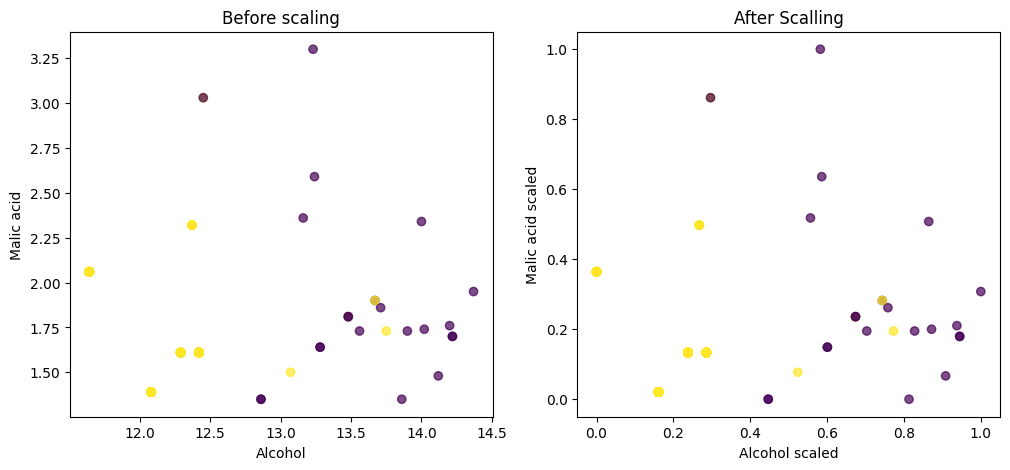

In [13]:
import matplotlib.pyplot as plt

fig, (ax1 , ax2) = plt.subplots(ncols= 2 , figsize = (12 ,5))

# Before scaling
ax1.scatter(x_train['Alcohol'] , x_train['Malic acid'] , c = y_train , cmap= 'viridis' , alpha= 0.7 )
ax1.set_title('Before scaling')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

# After scalling 
ax2.scatter(x_train_scaled['Alcohol'] , x_train_scaled['Malic acid'] , c = y_train , cmap= 'viridis' , alpha = 0.7)
ax2.set_title('After Scalling')
ax2.set_xlabel('Alcohol scaled')
ax2.set_ylabel('Malic acid scaled')

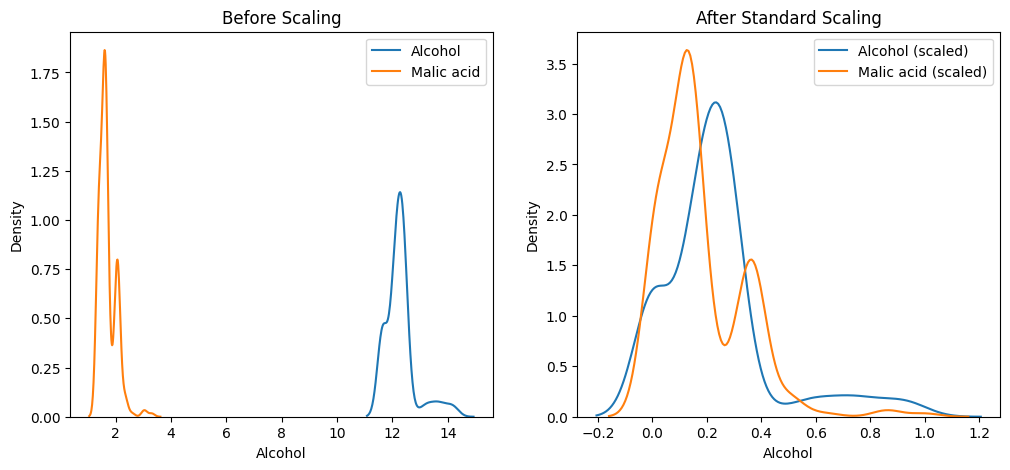

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x=x_train['Alcohol'], ax=ax1, label="Alcohol")
sns.kdeplot(x=x_train['Malic acid'], ax=ax1, label="Malic acid")
ax1.legend()

# After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x=x_train_scaled['Alcohol'], ax=ax2, label="Alcohol (scaled)")
sns.kdeplot(x=x_train_scaled['Malic acid'], ax=ax2, label="Malic acid (scaled)")
ax2.legend()

plt.show()


<Axes: title={'center': 'Alcohol Distribution  after Scaling '}, xlabel='Alcohol', ylabel='Density'>

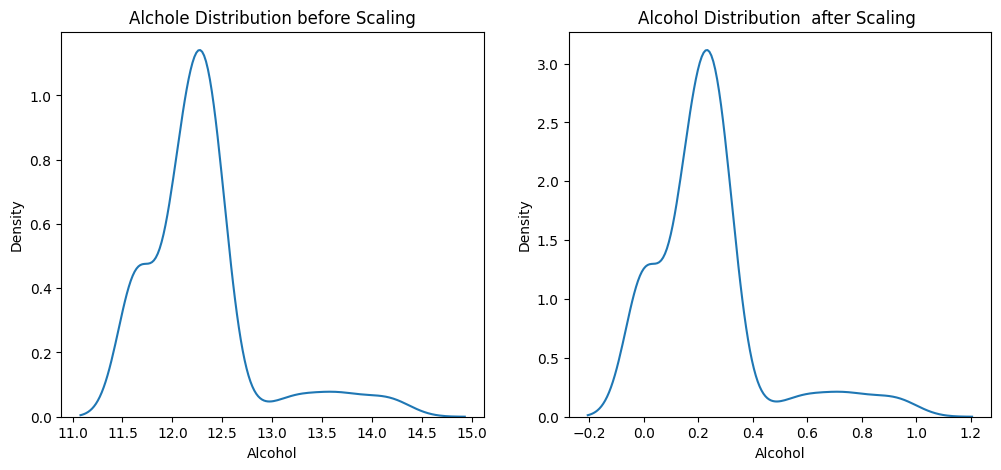

In [15]:
fig , (ax1 , ax2) = plt.subplots(ncols= 2 , figsize = (12 , 5))

# before scaling 
ax1.set_title('Alchole Distribution before Scaling')
sns.kdeplot(x_train['Alcohol'] , ax =ax1)

# after scaling 
ax2.set_title('Alcohol Distribution  after Scaling ')
sns.kdeplot(x_train_scaled['Alcohol'] , ax =ax2)

<Axes: title={'center': 'Alcohole Distribution After Standing Scaling'}, xlabel='Malic acid', ylabel='Density'>

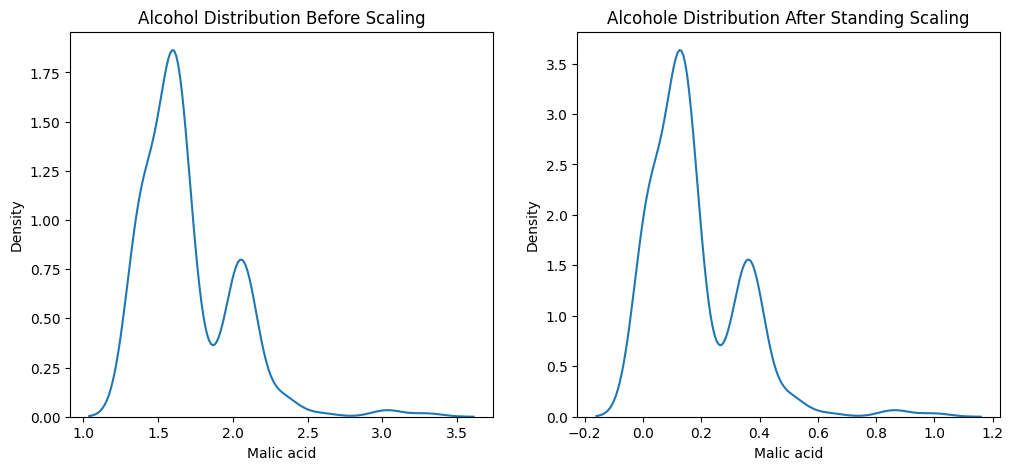

In [16]:
fig , (ax1 , ax2) = plt.subplots(ncols= 2 , figsize=(12 , 5))

# before scaling 
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'] , ax = ax1)

# after  scalling 
ax2.set_title('Alcohole Distribution After Standing Scaling')
sns.kdeplot(x_train_scaled['Malic acid'] , ax=ax2)
